## Import Package

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KDTree
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.tree import DecisionTreeClassifier

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Upload Datasets

In [2]:
data=pd.read_csv(r"C:\Users\Chuxu\ESE527\googleplaystore.csv")
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
data.shape

(10841, 13)

# Descriptive Analysis

## Data Cleaning

In [4]:
data = data.drop(['App','Genres','Type','Last Updated','Current Ver','Android Ver'], axis=1)

In [5]:
data[~data.Reviews.str.isnumeric()]

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
10472,1.9,19.0,3.0M,"1,000+",Free,Everyone,NaN


In [6]:
data=data.drop(data.index[10472])

In [7]:
items_to_remove=['+',',','$'] # Remove special symbols
cols_to_clean=['Installs','Price','Size']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_30328\2384576347.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col]=data[col].str.replace(item,'')


In [8]:
data['Installs'] = data['Installs'].astype('int') # Change data type
data['Price'] = data['Price'].astype('float')
data['Reviews'] = data['Reviews'].astype('int')

In [9]:
data['Size'] = data['Size'].str.replace('M','000')
data['Size'] = data['Size'].str.replace('k','')
data['Size'] = data['Size'].replace("Varies with device",np.nan)
data['Size'] = data['Size'].astype('float')
for i in data['Size']:
    if i < 10:
        data['Size'] = data['Size'].replace(i,i*1000)
data['Size'] = data['Size']/1000

In [10]:
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
                   'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})

In [11]:
data=data.dropna() # Remove all null value

In [12]:
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})
null
data.shape

(7729, 7)

In [13]:
data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19.0,10000,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14.0,500000,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,Everyone


In [14]:
duplicate = data.duplicated()
print(duplicate.sum())
data.drop_duplicates(inplace=True)
duplicate = data.duplicated()
print(duplicate.sum())

310
0


## Data Visualization

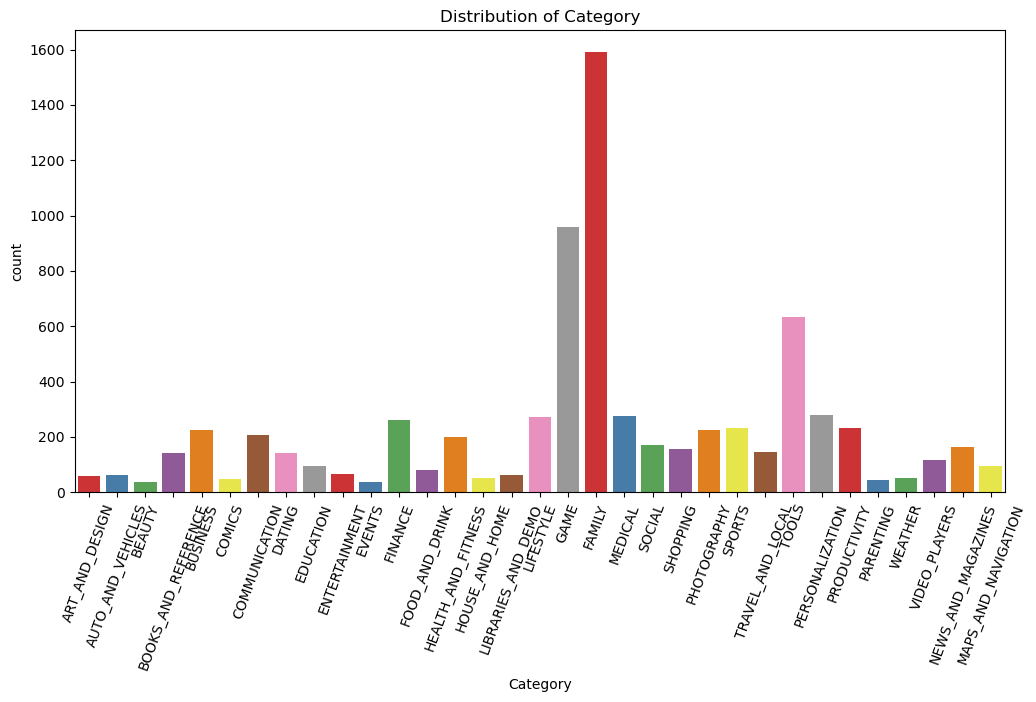

In [17]:
plt.rcParams['figure.figsize']=(12,6)
sns.countplot(x='Category',data=data,palette="Set1")
plt.xticks(rotation=70)
plt.title("Distribution of Category")
plt.show()

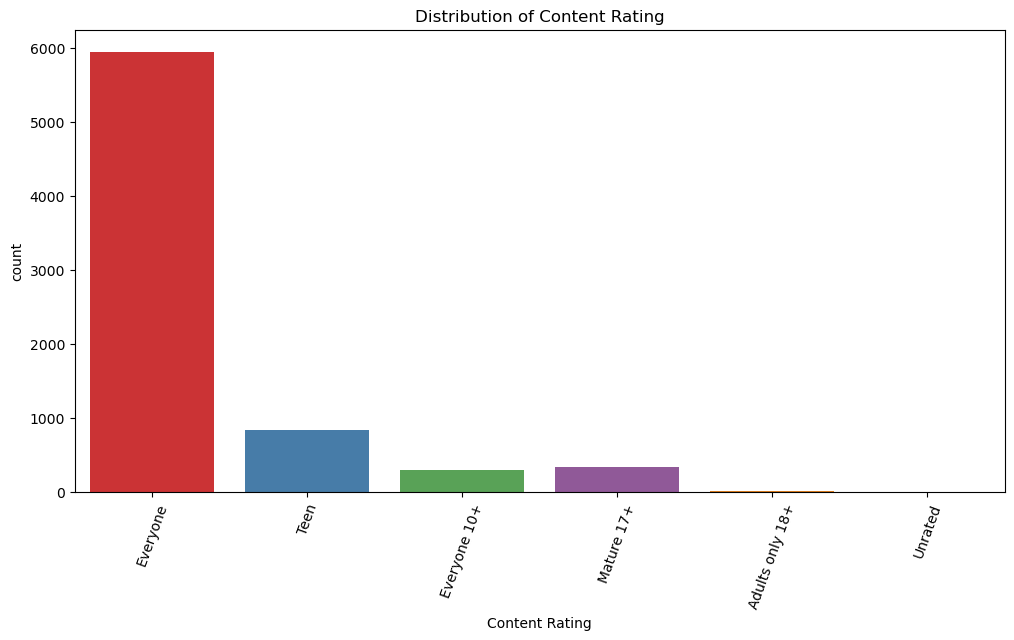

In [18]:
plt.rcParams['figure.figsize']=(12,6)
sns.countplot(x='Content Rating',data=data,palette="Set1")
plt.title("Distribution of Content Rating")
plt.xticks(rotation=70)
plt.show()

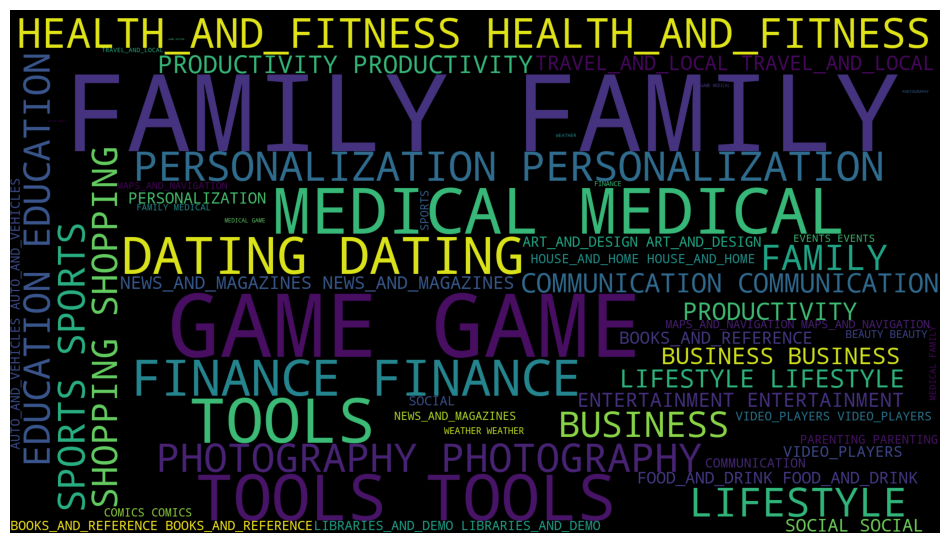

In [19]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(data.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

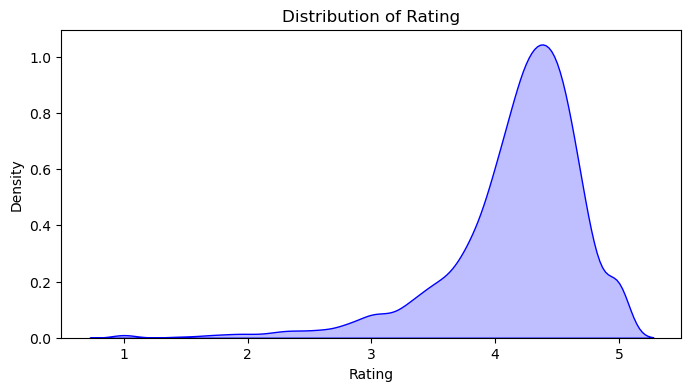

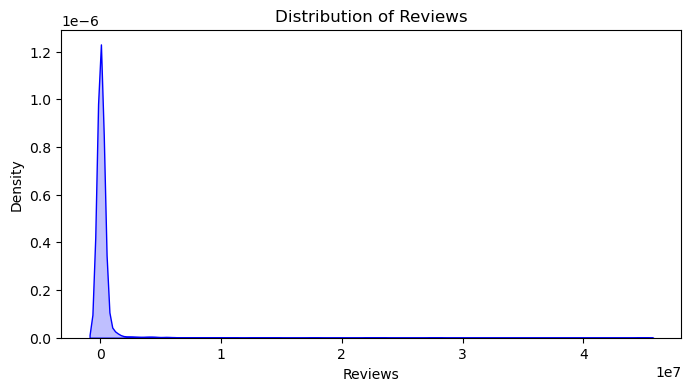

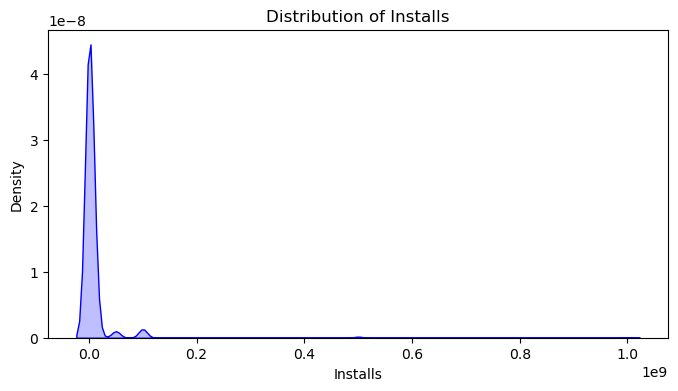

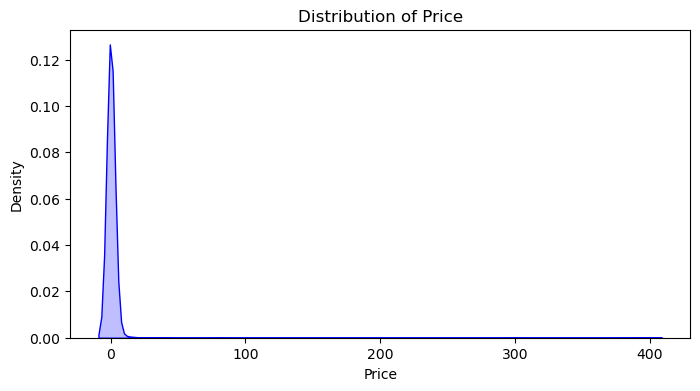

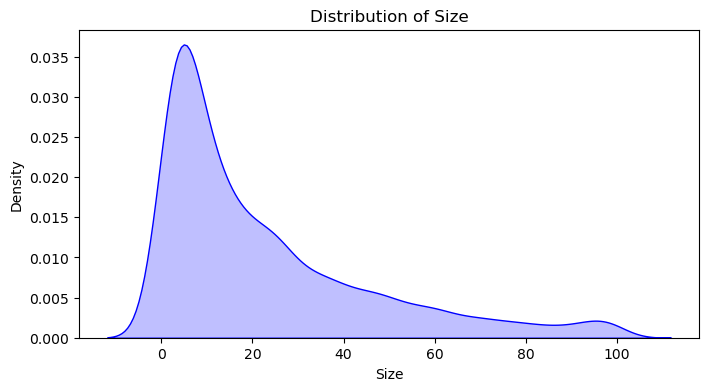

In [21]:
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size']
for i in range(5):
  plt.figure(figsize=(8,4))
  sns.kdeplot(data[numeric_cols[i]],color='blue',fill=True)
  plt.title("Distribution of "+numeric_cols[i])

<Axes: >

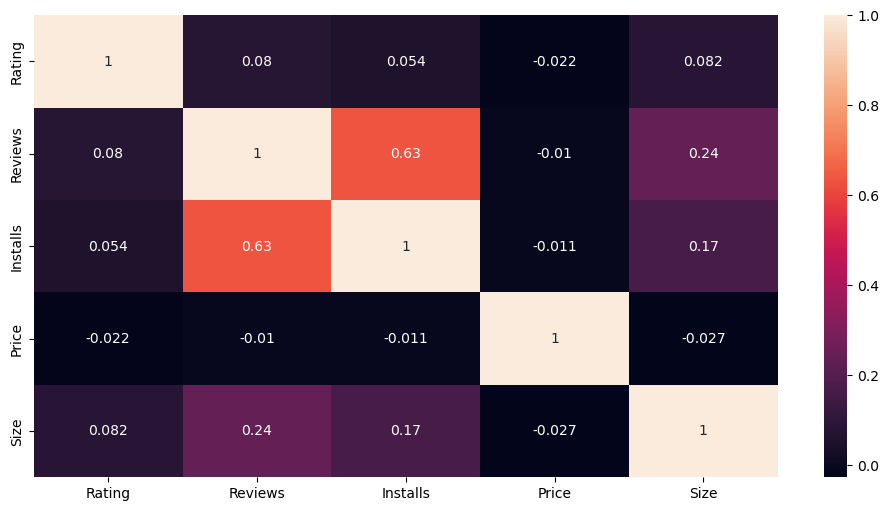

In [22]:
sns.heatmap(data[numeric_cols].corr(),annot=True)

## Data Encoding

In [23]:
def categorize_rating(rating):
    if rating >= 1 and rating < 1.5:
        return 1
    elif rating >= 1.5 and rating < 2:
        return 2
    elif rating >= 2 and rating < 2.5:
        return 3
    elif rating >= 2.5 and rating < 3:
        return 4
    elif rating >= 3 and rating < 3.5:
        return 5
    elif rating >= 3.5 and rating < 4:
        return 6
    elif rating >= 4 and rating < 4.5:
        return 7
    elif rating >= 4.5 and rating <= 5:
        return 8
    else:
        return np.nan  # Return NaN for ratings that don't match any condition
# Apply the function to the 'Rating' column to create the 'Rating Interval' column
data['Rating Interval'] = data['Rating'].apply(categorize_rating)


In [24]:
data = pd.get_dummies(data, columns=['Category', 'Content Rating'])
encoded_data_head = data.head()
original_shape = data.shape
encoded_shape = data.shape

In [25]:
data.head(5)

,Rating,Reviews,Size,Installs,Price,Rating Interval,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19.0,10000,0.0,7,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14.0,500000,0.0,6,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8.7,5000000,0.0,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,25.0,50000000,0.0,8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2.8,100000,0.0,7,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Standardization

In [26]:
def Standardization(dataframe):
    df_std = dataframe.copy()
    for col in df_std.columns:
        df_std[col] =(df_std[col]-df_std[col].mean())/df_std[col].std()
    return df_std

## Outlier Detection

In [27]:
len(data['Rating'].unique())

39

<Axes: >

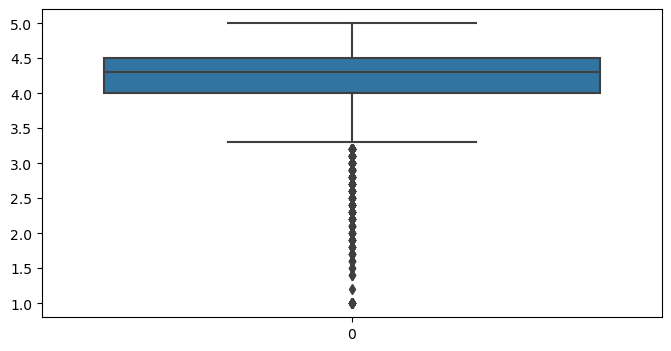

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Rating"])

<Axes: >

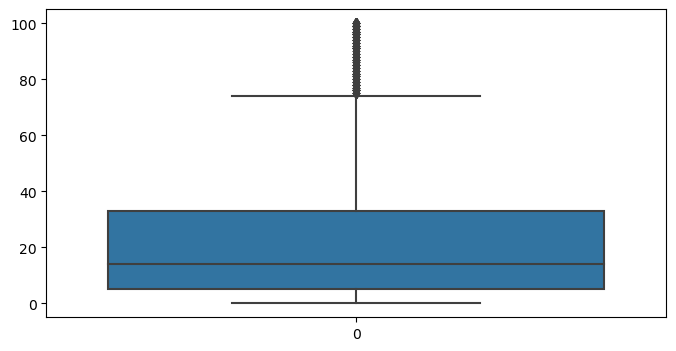

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Size"])

<Axes: >

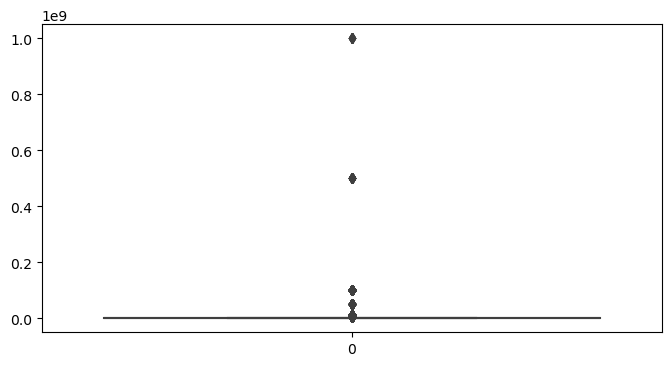

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Installs"])

<Axes: >

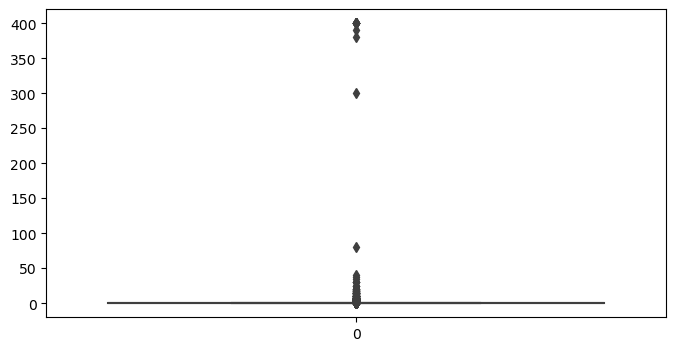

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Price"])

### DB-SCAN

In [32]:
from sklearn.cluster import DBSCAN
features = data[['Rating','Reviews', 'Price', 'Size', 'Installs']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(features_scaled)
non_outlier_indices = clusters != -1
data_db = data[non_outlier_indices]
outliers_removed = len(data) - len(data_db)
data_db_preview = data_db[['Rating','Price', 'Reviews', 'Size', 'Installs']].head()
outliers_removed, data_db_preview

(35,
    Rating  Price  Reviews  Size  Installs
 0     4.1    0.0      159  19.0     10000
 1     3.9    0.0      967  14.0    500000
 2     4.7    0.0    87510   8.7   5000000
 3     4.5    0.0   215644  25.0  50000000
 4     4.3    0.0      967   2.8    100000)

# Predictive Analysis

## Regression

In [33]:
features=data.drop(['Rating', 'Rating Interval'],axis=1)
label=data['Rating']
train_X,test_X,train_Y,test_Y=train_test_split(features,label,test_size=0.2,random_state=527)
rf = RandomForestRegressor(n_estimators=1000,
               criterion='squared_error',
               max_depth=None,
               min_samples_split=10,
               min_weight_fraction_leaf=0.02)
rf.fit(train_X, train_Y)
y_pred = rf.predict(test_X)
print('random forest accuracy:',rf.score(test_X, test_Y))

random forest accuracy: 0.132528636728088


In [34]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = train_X.columns
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Reviews                        0.518928
 2) Installs                       0.348329
 3) Size                           0.068038
 4) Category_TOOLS                 0.026775
 5) Category_FAMILY                0.020631
 6) Price                          0.008420
 7) Content Rating_Everyone        0.003787
 8) Category_PERSONALIZATION       0.003129
 9) Category_LIFESTYLE             0.000979
10) Category_FINANCE               0.000489
11) Content Rating_Teen            0.000198
12) Category_GAME                  0.000184
13) Category_MEDICAL               0.000079
14) Content Rating_Mature 17+      0.000034
15) Category_BOOKS_AND_REFERENCE   0.000000
16) Category_COMICS                0.000000
17) Category_COMMUNICATION         0.000000
18) Category_BEAUTY                0.000000
19) Category_DATING                0.000000
20) Category_EDUCATION             0.000000
21) Category_ENTERTAINMENT         0.000000
22) Category_AUTO_AND_VEHICLES     0.000000
23) Category_ART_AND_DESIGN     

## Classification without outlier detection

### Split dataset

In [76]:
features=data.drop(['Rating', 'Rating Interval'],axis=1)
label=data['Rating Interval']
standardized_features=Standardization(features)
train_X,test_X,train_Y,test_Y=train_test_split(standardized_features,label,test_size=0.2,random_state=527)

### Support Vector Machine

In [77]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
gamma_range = ['scale','auto']
C_range = np.linspace(1,10,4)
param_grid = dict(gamma = gamma_range, C=C_range, kernel=kernel,max_iter=[15000])
grid = GridSearchCV(svm.SVC(cache_size=5000), param_grid=param_grid, cv=5)
grid.fit(train_X, train_Y)

c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_it

GridSearchCV(cv=5, estimator=SVC(cache_size=5000),
             param_grid={'C': array([ 1.,  4.,  7., 10.]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [15000]})

In [78]:
print(classification_report(test_Y,grid.best_estimator_.predict(test_X),digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000         3
           2     0.0000    0.0000    0.0000         5
           3     0.0000    0.0000    0.0000        17
           4     0.0000    0.0000    0.0000        31
           5     0.0000    0.0000    0.0000        74
           6     0.0000    0.0000    0.0000       235
           7     0.4731    0.8541    0.6089       658
           8     0.4586    0.2885    0.3542       461

    accuracy                         0.4683      1484
   macro avg     0.1165    0.1428    0.1204      1484
weighted avg     0.3522    0.4683    0.3800      1484



c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_.score(test_X,test_Y))

0.465206402695872
{'C': 4.0, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 15000}
0.4683288409703504


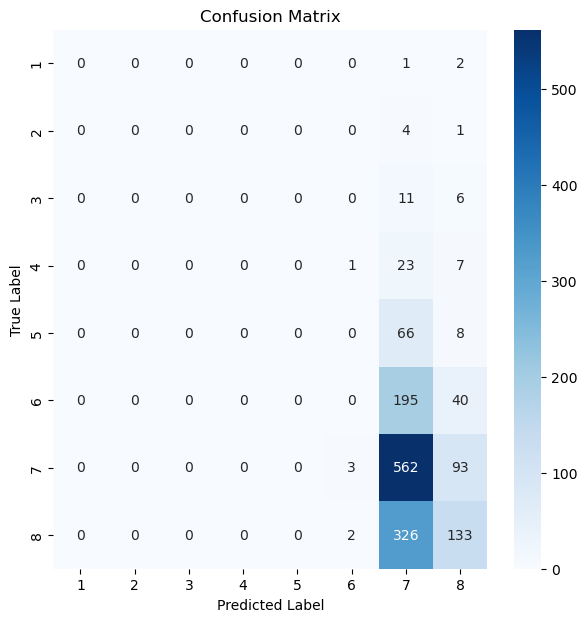

In [80]:
best_model = grid.best_estimator_
predictions = best_model.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',ax=ax,xticklabels=['1','2','3','4','5','6','7','8'],
            yticklabels=['1','2','3','4','5','6','7','8'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Random Forest

In [52]:
n_estimators = [500,1000,2000]
criterion=['gini', 'entropy']
max_features=np.arange(1,10,1)
param_grid = dict(n_estimators=n_estimators, criterion=criterion)
param_grid

{'n_estimators': [500, 1000, 2000], 'criterion': ['gini', 'entropy']}

In [53]:
clf = RandomForestClassifier(random_state=417)
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(train_X,train_Y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=417),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [500, 1000, 2000]})

In [54]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_.score(test_X,test_Y))

0.49553493345105065
{'criterion': 'entropy', 'n_estimators': 500}
0.4946091644204852


In [55]:
print(classification_report(test_Y,grid_search.best_estimator_.predict(test_X),digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000         3
           2     0.0000    0.0000    0.0000         5
           3     0.0000    0.0000    0.0000        17
           4     0.0000    0.0000    0.0000        31
           5     0.2286    0.1081    0.1468        74
           6     0.2687    0.1532    0.1951       235
           7     0.5317    0.6748    0.5948       658
           8     0.5279    0.5336    0.5307       461

    accuracy                         0.4946      1484
   macro avg     0.1946    0.1837    0.1834      1484
weighted avg     0.4537    0.4946    0.4668      1484



In [56]:
y_pred=grid_search.best_estimator_.predict(test_X)
y_true=test_Y
cm=confusion_matrix(y_true,y_pred)
cm

array([[  0,   0,   0,   0,   0,   0,   2,   1],
       [  1,   0,   0,   0,   1,   0,   1,   2],
       [  0,   0,   0,   1,   2,   3,   6,   5],
       [  0,   0,   0,   0,   2,   9,  17,   3],
       [  0,   0,   0,   0,   8,  17,  33,  16],
       [  0,   2,   1,   3,   7,  36, 141,  45],
       [  0,   2,   0,   2,   9,  53, 444, 148],
       [  0,   0,   0,   2,   6,  16, 191, 246]], dtype=int64)

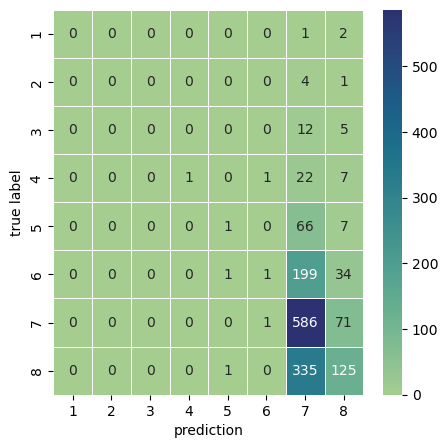

In [64]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="crest",fmt=".0f",ax=ax,xticklabels=['1','2','3','4','5','6','7','8'],
            yticklabels=['1','2','3','4','5','6','7','8'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

## Classification with DBSCAN

### Split dataset

In [81]:
features=data_db.drop(['Rating', 'Rating Interval'],axis=1)
label=data_db['Rating Interval']
standardized_features=Standardization(features)
train_X,test_X,train_Y,test_Y=train_test_split(standardized_features,label,test_size=0.2,random_state=527)

### Support Vector Machine

In [82]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
gamma_range = ['scale','auto']
C_range = np.linspace(1,10,4)
param_grid = dict(gamma = gamma_range, C=C_range, kernel=kernel,max_iter=[15000])
grid = GridSearchCV(svm.SVC(cache_size=5000), param_grid=param_grid, cv=5)
grid.fit(train_X, train_Y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_.score(test_X,test_Y))

c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_it

0.46132002619019985
{'C': 7.0, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 15000}
0.46580907244414355


c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [83]:
print(classification_report(test_Y,grid.best_estimator_.predict(test_X),digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000         5
           2     0.0000    0.0000    0.0000         9
           3     0.0000    0.0000    0.0000        18
           4     0.0000    0.0000    0.0000        41
           5     0.0000    0.0000    0.0000        78
           6     0.3333    0.0094    0.0183       212
           7     0.4708    0.8706    0.6111       657
           8     0.4488    0.2495    0.3207       457

    accuracy                         0.4658      1477
   macro avg     0.1566    0.1412    0.1188      1477
weighted avg     0.3961    0.4658    0.3737      1477



c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chuxu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_.score(test_X,test_Y))

0.46132002619019985
{'C': 7.0, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 15000}
0.46580907244414355


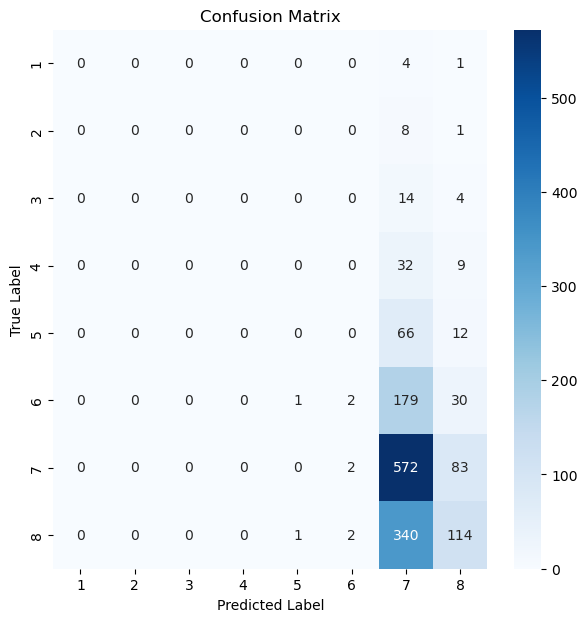

In [85]:
best_model = grid.best_estimator_
predictions = best_model.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',ax=ax,xticklabels=['1','2','3','4','5','6','7','8'],
            yticklabels=['1','2','3','4','5','6','7','8'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Random Forest

In [70]:
n_estimators = [500,1000,2000]
criterion=['gini', 'entropy']
max_features=np.arange(1,10,1)
param_grid = dict(n_estimators=n_estimators, criterion=criterion)
clf = RandomForestClassifier(random_state=417)
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(train_X,train_Y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=417),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [500, 1000, 2000]})

In [71]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_.score(test_X,test_Y))

0.48332486879972913
{'criterion': 'gini', 'n_estimators': 2000}
0.4976303317535545


In [72]:
print(classification_report(test_Y,grid_search.best_estimator_.predict(test_X),digits=4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000         5
           2     0.5000    0.1111    0.1818         9
           3     0.0000    0.0000    0.0000        18
           4     0.2000    0.0488    0.0784        41
           5     0.1071    0.0385    0.0566        78
           6     0.2222    0.1509    0.1798       212
           7     0.5516    0.6667    0.6037       657
           8     0.5254    0.5667    0.5453       457

    accuracy                         0.4976      1477
   macro avg     0.2633    0.1978    0.2057      1477
weighted avg     0.4541    0.4976    0.4693      1477



In [73]:
y_pred=grid_search.best_estimator_.predict(test_X)
y_true=test_Y
cm=confusion_matrix(y_true,y_pred)
cm

array([[  0,   0,   0,   0,   0,   0,   2,   3],
       [  0,   1,   0,   0,   0,   1,   3,   4],
       [  0,   0,   0,   1,   0,   3,   7,   7],
       [  1,   0,   1,   2,   1,   7,  18,  11],
       [  0,   0,   0,   1,   3,  16,  43,  15],
       [  0,   0,   4,   1,   6,  32, 118,  51],
       [  0,   0,   0,   5,  14,  57, 438, 143],
       [  0,   1,   0,   0,   4,  28, 165, 259]], dtype=int64)

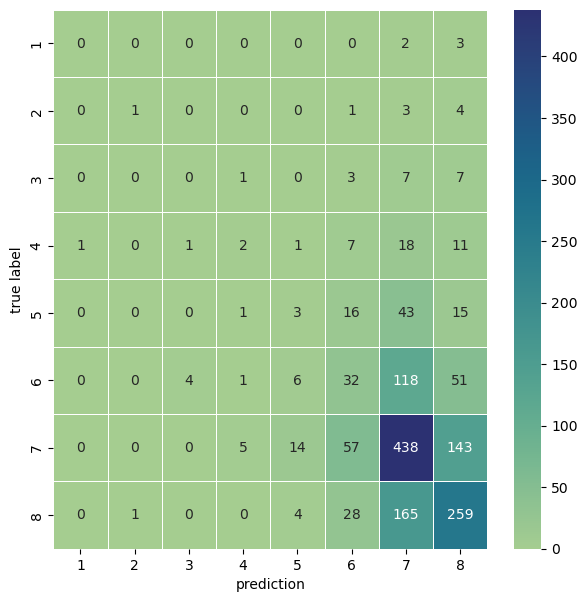

In [75]:
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="crest",fmt=".0f",ax=ax,xticklabels=['1','2','3','4','5','6','7','8'],
            yticklabels=['1','2','3','4','5','6','7','8'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()